### Importing libraries 

In [1]:
import requests
import pandas as pd
import shapefile
from shapely.geometry import Point # Point class
from shapely.geometry import shape # shape() is a function to convert geo objects through the interface
import matplotlib.pyplot as plt

## Weather Data

Here, we are taking climate data from an open weather API for different places in Gippsland and storing it in a dataframe.The following steps are used to obtain the final dataframe.

#### Make a list of suburbs in Gippsland

In [2]:
list_suburbs = ['Aberfeldy','Agnes','Allambee','Almurta','Anderson', 'Arawata', 'Archies Creek', 'Athlone', 'Bass', 'Baw Baw', 'Bena', 'Berrys Creek', 'Bona Vista', 'Boolarra', 'Boolarra South', 'Brandy Creek', 'Budgeree', 'Buffalo', 'Buln Buln', 'Callignee', 'Cape Woolamai', 'Childers', 'Churchill', 
'Cloverlea', 'Coalville', 'Corinella', 'Coronet Bay', 'Cowes', 'Crossover', 'Dalyston','Darnum', 'Delburn', 'Dollar', 'Driffield', 'Drouin', 'Drouin West', 'Dudley', 'Dumbalk', 'Ellinbank', 'Erica', 'Ferndale', 'Fish Creek', 'Flynn', 'Foster', 'French Island', 'Fumina', 'Glen Forbes',
'Glengarry', 'Grantville', 'Hallora', 'Hallston', 'Hazel Park', 'Hazelwood', 'Hedley', 'Hill End', 'Icy Creek', 'Inverloch', 'Jam Jerrup', 'Jeeralang', 'Jeeralang Junction', 'Jeetho', 'Jindivick', 'Jumbuk', 'Jumbunna', 'Kardella', 'Kernot', 'Kilcunda', 'Kongwak', 'Koonwarra', 'Koornalla', 'Korumburra', 
'Krowera', 'Labertouche', 'Lardner', 'Leongatha', 'Lillico', 'Loch', 'Longwarry', 'Mardan', 'McMahons Creek', 'Meeniyan', 'Mirboo', 'Mirboo North', 'Modella', 'Moe', 'Morwell', 'Narracan', 'Nayook', 'Neerim', 'Neerim South', 'Newborough', 'Newhaven', 'Nilma', 'Nilma North', 'Noojee', 'North Wonthaggi',
'Nyora', 'Outtrim', 'Phillip Island', 'Piedmont', 'Pioneer Bay', 'Poowong', 'Port Franklin', 'Port Welshpool', 'Ranceby', 'Rawson', 'Rhyll','Rokeby', 'Ruby', 'San Remo', 'Sandy Point', 'Shady Creek', 'Silverleaves', 'South Dudley', 'Stony Creek', 'Strzelecki', 'Sunderland Bay', 'Sunset Strip', 'Surf Beach', 
'Tanjil Bren', 'Tanjil South', 'Tarwin', 'Tarwin Lower', 'Tenby Point', 'The Gurdies', 'Thorpdale', 'Toongabbie', 'Toora', 'Torwood', 'Trafalgar', 'Trafalgar East', 'Trafalgar South', 'Traralgon', 'Traralgon South', 'Trida', 'Turtons Creek', 'Tyers', 'Ventnor', 'Venus Bay', 'Vesper', 'Walhalla', 'Walkerville',
'Waratah Bay', 'Warragul','Wattle Bank', 'Welshpool', 'West Creek', 'Westbury', 'Willow Grove', 'Wimbledon Heights', 'Wonga', 'Wonthaggi', 'Woodleigh',  'Woolamai','Yallourn', 'Yallourn North', 'Yanakie', 'Yarragon', 'Yinnar', 'Yinnar South']


In [3]:
len(list_suburbs) #length 

160

#### Read the csv file which contains suburbs and post code

In [4]:
#Suburbs.csv is a file which contains the Locality Name , Post code and Muncipality Name in Australia
sub = pd.read_csv('suburbs.csv')

In [5]:
sub.head()

,Locality Name,Post Code,Municipality Name
0,Abbeyard,3737,Alpine Shire Council
1,Abbotsford,3067,Yarra City Council
2,Aberfeldie,3040,Moonee Valley City Council
3,Aberfeldy,3825,Baw Baw Shire Council
4,Acheron,3714,Murrindindi Shire Council


In [6]:
sub.tail()

,Locality Name,Post Code,Municipality Name
3221,Yulecart,3301,Southern Grampians Shire Council
3222,Yundool,3727,Moira Shire Council
3223,Yuroke,3063,Hume City Council
3224,Yuulong,3237,Colac Otway Shire Council
3225,Zeerust,3634,Greater Shepparton City Council


In [7]:
len(sub)

3226

In [8]:
#Droping all locality name that is not there in the list of suburbs
sub.drop(index=sub[~sub['Locality Name'].isin(list_suburbs) ].index, inplace=True)
sub.reset_index(inplace=True, drop=True)

In [9]:
#checking for duplicates
sub[sub.duplicated()]

,Locality Name,Post Code,Municipality Name


In [10]:
# sub.to_csv('temp.csv')

#### Getting required data from Open Weather API

In [11]:
#Creating empty lists for all the datas that are required
suburbs = []
lat = []
lon = []
temp = []
wind_speed = []
description = []
post_code = []
#loop for iterating through each post code in Gippsland
for i in range(len(sub)):
    url = "http://api.openweathermap.org/data/2.5/weather?zip={}&appid=79ab7afe9488e5e8236e3054f20c6947".format(str(sub['Post Code'][i])+",au")
#     print(url)
    res = requests.get(url)
    data = res.json()
    suburbs.append(str(sub['Locality Name'][i]))  
#     print(data)
    postcode = str(sub['Post Code'][i])         
    latitude = data['coord']['lat']            
    longitude = data['coord']['lon']              
    temperature = data['main']['temp']           
    wind = data['wind']['speed']
    #append obtained values into the given list
    post_code.append(postcode)
    lat.append(latitude)
    lon.append(longitude)
    temp.append(temperature)
    wind_speed.append(wind)
        
    weather_access = data['weather']
    for weather_data in weather_access:
        desc = weather_data['description']
        description.append(desc)
#         print(description)


In [12]:
#suburbs

In [13]:
#post_code

In [14]:
#lat
#lon

In [15]:
#temp

#### Creating dataframe

In [16]:
gipps_data_frame = pd.DataFrame(data=zip(suburbs, post_code, lat, lon, temp, description, wind_speed),columns=['Suburbs','Post Code', 'Latitude','Longitude', 'Temperature', 'Description', 'Wind'  ])

In [17]:
gipps_data_frame.head()

,Suburbs,Post Code,Latitude,Longitude,Temperature,Description,Wind
0,Aberfeldy,3825,-37.95,146.40,279.26,overcast clouds,1.50
1,Agnes,3962,-38.56,146.39,280.38,overcast clouds,1.55
2,Allambee,3823,-38.21,146.06,280.93,overcast clouds,0.89
3,Almurta,3979,-38.52,145.70,282.37,overcast clouds,0.89
4,Anderson,3995,-38.57,145.70,282.34,overcast clouds,2.35


#### Plotting

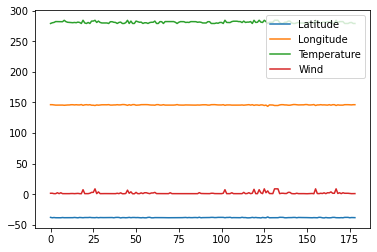

In [18]:
gipps_data_frame.plot()
plt.show(block=True)

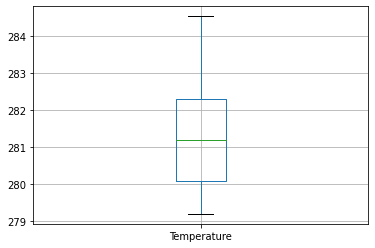

In [19]:
#boxplot for temperature
gipps_data_frame.boxplot(column=['Temperature'])

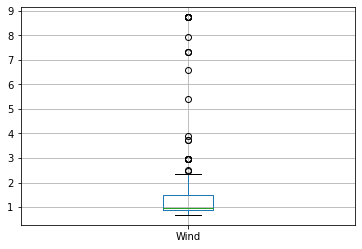

In [20]:
#boxplot for wind
gipps_data_frame.boxplot(column=['Wind'])

## Soil Data

For soil, we have shapefile and database file to obtain the soil type of different locations in Gippsland as shown below:

#### Reading the required file:

In [21]:
#Reading the database file
shapefile_path = r'gippsland_land_units.dbf'
shape_file = shapefile.Reader(shapefile_path, encoding = 'Shift-JIS')

fields = [x[0] for x in shape_file.fields][1:]
records = shape_file.records()
shps = [s.points for s in shape_file.shapes()]
#Creating a dataframe 
sf_df = pd.DataFrame(columns = fields, data = records)

#### Remove all unwanted columns from the table

In [22]:
sf_df=sf_df.drop(['SYM_COLOUR', 'ASC_OSO','ASC_O','ASC_SO'], axis = 1)

In [23]:
sf_df.head()

,SOIL,SOIL_TYPE,GMU3,LANDFORM,GEOLOGY,DOM_SOIL
0,Wg,Warragul,3.5,Rolling Low Hills to Undulating Rises,Tertiary Basalts,Acidic Red Ferrosols
1,Fl,Flinders,3.2.1,Rolling low hills,Tertiary basalts,Brown Dermosols with some Brown Ferrosols
2,water,water,water,,,
3,Wg,Warragul,3.5,Rolling Low Hills to Undulating Rises,Tertiary Basalts,Acidic Red Ferrosols
4,Nr,Narre,7.1.2,Level Plain,Pleistocene (late) to Recent sediments,


In [24]:
sf_df.tail()

,SOIL,SOIL_TYPE,GMU3,LANDFORM,GEOLOGY,DOM_SOIL
3604,Gy,Gelantipy,,Undulating to rolling low hills,Tertiary basalt,
3605,Mg,Murrungowar,,Undulating to rolling low hills,Granite,
3606,Mg,Murrungowar,,Undulating to rolling low hills,Granite,
3607,Mg,Murrungowar,,Undulating to rolling low hills,Granite,
3608,Mg,Murrungowar,,Undulating to rolling low hills,Granite,


In [25]:
# shps

### Connecting dataframes:

Here, we are going to connect soil dataframe and the dataframe that contains weather data based on latitude and longitude of places in Gippsland

In [26]:
gipps_data_frame['soil_type'] = ['' for i in gipps_data_frame['Latitude']]
gipps_data_frame['landform'] = ['' for i in gipps_data_frame['Latitude']]
gipps_data_frame['geology'] = ['' for i in gipps_data_frame['Latitude']]

all_shapes = shape_file.shapes() # get all the polygons
all_records = shape_file.records()
for j in range(len(gipps_data_frame)):
    point = (float(gipps_data_frame['Longitude'][j]), float(gipps_data_frame['Latitude'][j])) 
#     print(point)
    for i in range(len(all_shapes)):
        boundary = all_shapes[i] # get a boundary polygon
        if Point(point).within(shape(boundary)): # make a point and see if it's in the polygon
            gipps_data_frame['soil_type'][j] = all_records[i][1] # get the soil type field of the corresponding record
            gipps_data_frame['landform'][j] = all_records[i][4] # get the landform field of the corresponding record
            gipps_data_frame['geology'][j] = all_records[i][5]  # get the geology field of the corresponding record
#             print("The point is ", gipps_data_frame['soil_type']) 
#             print("The landform is ",gipps_data_frame ['landform'])
#             print("The geology is", gipps_data_frame['geology'])
            break
   

<ipython-input-26-7915529f4cfb>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gipps_data_frame['soil_type'][j] = all_records[i][1] # get the soil type field of the corresponding record
<ipython-input-26-7915529f4cfb>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gipps_data_frame['landform'][j] = all_records[i][4] # get the landform field of the corresponding record
<ipython-input-26-7915529f4cfb>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

In [27]:
#Replacing null values with 'Not Available'
gipps_data_frame.loc[gipps_data_frame["soil_type"] == '','soil_type'] = "Not Available"
gipps_data_frame.loc[gipps_data_frame["landform"] == '','landform'] = "Not Available"
gipps_data_frame.loc[gipps_data_frame["geology"] == '','geology'] = "Not Available"


In [28]:
len(gipps_data_frame)

179

In [29]:
# gipps_data_frame.loc[gipps_data_frame.geology == 'Not Available', 'soil_type'].count()

In [30]:
# gipps_data_frame[gipps_data_frame['soil_type'] == ''].drop_duplicates()


### Adding another API for rain forecast:

In [31]:
#Adding new columns for rain forecast datas

gipps_data_frame['rain_day 0'] = ['0.0' for i in gipps_data_frame['Suburbs']]
gipps_data_frame['rain_day 1'] = ['0.0' for i in gipps_data_frame['Suburbs']]
gipps_data_frame['rain_day 2'] = ['0.0' for i in gipps_data_frame['Suburbs']]
gipps_data_frame['rain_day 3'] = ['0.0' for i in gipps_data_frame['Suburbs']]
gipps_data_frame['rain_day 4'] = ['0.0' for i in gipps_data_frame['Suburbs']]
gipps_data_frame['rain_day 5'] = ['0.0' for i in gipps_data_frame['Suburbs']]
gipps_data_frame['rain_day 6'] = ['0.0' for i in gipps_data_frame['Suburbs']]
gipps_data_frame['rain_day 7'] = ['0.0' for i in gipps_data_frame['Suburbs']]


In [32]:
gipps_data_frame.head()

,Suburbs,Post Code,Latitude,Longitude,Temperature,Description,Wind,soil_type,landform,geology,rain_day 0,rain_day 1,rain_day 2,rain_day 3,rain_day 4,rain_day 5,rain_day 6,rain_day 7
0,Aberfeldy,3825,-37.95,146.40,279.26,overcast clouds,1.50,Not Available,Not Available,Not Available,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Agnes,3962,-38.56,146.39,280.38,overcast clouds,1.55,Strzelecki,Cretaceous sediments,"Acidic Grey, Yellow and Brown Dermosols",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Allambee,3823,-38.21,146.06,280.93,overcast clouds,0.89,Yarragon,Pleistocene (late) sediments,Not Available,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Almurta,3979,-38.52,145.70,282.37,overcast clouds,0.89,Strzelecki,Cretaceous sediments,"Acidic Grey, Yellow and Brown Dermosols",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Anderson,3995,-38.57,145.70,282.34,overcast clouds,2.35,Leongatha Sth,Tertiary sediments,Not Available,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
#Storing values of rain forecast for 7 days collected from API into the respective columns
vals = []
dates = []
for i in range(len(gipps_data_frame)):
    url = "https://api.openweathermap.org/data/2.5/onecall?lat={lat}&lon={lon}&appid=79ab7afe9488e5e8236e3054f20c6947".format(lat=str(gipps_data_frame['Latitude'][i]), lon=str(gipps_data_frame['Longitude'][i]))
#     print(url)
    res = requests.get(url)
    data = res.json() 
    for ix, daily_data in enumerate(data['daily']):
    #     print(daily_data)
        if 'rain' in daily_data.keys():
#             print(daily_data['dt'], daily_data['rain'] , 'mm')
            vals.append(float(daily_data['rain']))
            dates.append(daily_data['dt'])
            gipps_data_frame['rain_day '+str(ix)][i] = daily_data['rain']
        else:
#             print(daily_data['dt'], 'No rain')
            vals.append(0.0)
            dates.append(daily_data['dt'])
        
            gipps_data_frame['rain_day '+str(ix)][i] = 0.0

<ipython-input-33-c0623c74d978>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gipps_data_frame['rain_day '+str(ix)][i] = 0.0
<ipython-input-33-c0623c74d978>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gipps_data_frame['rain_day '+str(ix)][i] = daily_data['rain']


### Final dataframe 

In [34]:
gipps_data_frame.head()

,Suburbs,Post Code,Latitude,Longitude,Temperature,Description,Wind,soil_type,landform,geology,rain_day 0,rain_day 1,rain_day 2,rain_day 3,rain_day 4,rain_day 5,rain_day 6,rain_day 7
0,Aberfeldy,3825,-37.95,146.40,279.26,overcast clouds,1.50,Not Available,Not Available,Not Available,0,0.66,0.7,0,0.86,0,0,2.63
1,Agnes,3962,-38.56,146.39,280.38,overcast clouds,1.55,Strzelecki,Cretaceous sediments,"Acidic Grey, Yellow and Brown Dermosols",0,4.72,1.47,0,1.99,0,0,4.88
2,Allambee,3823,-38.21,146.06,280.93,overcast clouds,0.89,Yarragon,Pleistocene (late) sediments,Not Available,0,3.34,1.72,0,1.48,0,0,3.32
3,Almurta,3979,-38.52,145.70,282.37,overcast clouds,0.89,Strzelecki,Cretaceous sediments,"Acidic Grey, Yellow and Brown Dermosols",0,1.77,1.75,0.4,1.79,0,0,5.72
4,Anderson,3995,-38.57,145.70,282.34,overcast clouds,2.35,Leongatha Sth,Tertiary sediments,Not Available,0,1.69,1.73,0.41,1.65,0,0,5.81


In [35]:
gipps_data_frame.tail()

,Suburbs,Post Code,Latitude,Longitude,Temperature,Description,Wind,soil_type,landform,geology,rain_day 0,rain_day 1,rain_day 2,rain_day 3,rain_day 4,rain_day 5,rain_day 6,rain_day 7
174,Yallourn North,3825,-37.95,146.40,279.26,overcast clouds,1.50,Not Available,Not Available,Not Available,0,0.66,0.7,0,0.86,0,0,2.63
175,Yanakie,3960,-38.56,146.16,280.61,overcast clouds,1.16,Strzelecki,Cretaceous sediments,"Acidic Grey, Yellow and Brown Dermosols",0,4.65,1.82,0,2.55,0,0,5.67
176,Yarragon,3823,-38.21,146.06,280.93,overcast clouds,0.89,Yarragon,Pleistocene (late) sediments,Not Available,0,3.34,1.72,0,1.48,0,0,3.32
177,Yinnar,3869,-38.38,146.38,279.26,overcast clouds,0.97,Boolarra with Morwell,Tertiary (Pliocene) sediments,Acidic Yellow and Grey Dermosols & Kurosols/Ac...,0,3.55,1.34,0,1.46,0,0,3.75
178,Yinnar South,3869,-38.38,146.38,279.26,overcast clouds,0.97,Boolarra with Morwell,Tertiary (Pliocene) sediments,Acidic Yellow and Grey Dermosols & Kurosols/Ac...,0,3.55,1.34,0,1.46,0,0,3.75


### Writing into csv file

In [36]:
# Write the final dataframe into a csv file
gipps_data_frame.to_csv("weather_gippsland.csv")

#### Creating a csv file for rain forecast from the existing csv file:

In [37]:
rain_forecast_dataframe = pd.read_csv("weather_gippsland.csv")
rain_forecast_dataframe.head()

,Unnamed: 0,Suburbs,Post Code,Latitude,Longitude,Temperature,Description,Wind,soil_type,landform,geology,rain_day 0,rain_day 1,rain_day 2,rain_day 3,rain_day 4,rain_day 5,rain_day 6,rain_day 7
0,0,Aberfeldy,3825,-37.95,146.40,279.26,overcast clouds,1.50,Not Available,Not Available,Not Available,0.0,0.66,0.70,0.00,0.86,0.0,0.0,2.63
1,1,Agnes,3962,-38.56,146.39,280.38,overcast clouds,1.55,Strzelecki,Cretaceous sediments,"Acidic Grey, Yellow and Brown Dermosols",0.0,4.72,1.47,0.00,1.99,0.0,0.0,4.88
2,2,Allambee,3823,-38.21,146.06,280.93,overcast clouds,0.89,Yarragon,Pleistocene (late) sediments,Not Available,0.0,3.34,1.72,0.00,1.48,0.0,0.0,3.32
3,3,Almurta,3979,-38.52,145.70,282.37,overcast clouds,0.89,Strzelecki,Cretaceous sediments,"Acidic Grey, Yellow and Brown Dermosols",0.0,1.77,1.75,0.40,1.79,0.0,0.0,5.72
4,4,Anderson,3995,-38.57,145.70,282.34,overcast clouds,2.35,Leongatha Sth,Tertiary sediments,Not Available,0.0,1.69,1.73,0.41,1.65,0.0,0.0,5.81


In [38]:
rain_forecast_dataframe=rain_forecast_dataframe.drop(['Unnamed: 0', 'Latitude','Longitude','Temperature', 'Description', 'Wind', 'soil_type', 'landform', 'geology'], axis = 1)

In [39]:
rain_forecast_dataframe.rename(columns={'rain_day 0':'Rain_Today(in mm)'}, inplace=True)
rain_forecast_dataframe.rename(columns={'rain_day 1':'Rain_day_1(in mm)'}, inplace=True)
rain_forecast_dataframe.rename(columns={'rain_day 2':'Rain_day_2(in mm)'}, inplace=True)
rain_forecast_dataframe.rename(columns={'rain_day 3':'Rain_day_3(in mm)'}, inplace=True)
rain_forecast_dataframe.rename(columns={'rain_day 4':'Rain_day_4(in mm)'}, inplace=True)
rain_forecast_dataframe.rename(columns={'rain_day 5':'Rain_day_5(in mm)'}, inplace=True)
rain_forecast_dataframe.rename(columns={'rain_day 6':'Rain_day_6(in mm)'}, inplace=True)
rain_forecast_dataframe.rename(columns={'rain_day 7':'Rain_day_7(in mm)'}, inplace=True)

In [40]:
rain_forecast_dataframe.head()

,Suburbs,Post Code,Rain_Today(in mm),Rain_day_1(in mm),Rain_day_2(in mm),Rain_day_3(in mm),Rain_day_4(in mm),Rain_day_5(in mm),Rain_day_6(in mm),Rain_day_7(in mm)
0,Aberfeldy,3825,0.0,0.66,0.70,0.00,0.86,0.0,0.0,2.63
1,Agnes,3962,0.0,4.72,1.47,0.00,1.99,0.0,0.0,4.88
2,Allambee,3823,0.0,3.34,1.72,0.00,1.48,0.0,0.0,3.32
3,Almurta,3979,0.0,1.77,1.75,0.40,1.79,0.0,0.0,5.72
4,Anderson,3995,0.0,1.69,1.73,0.41,1.65,0.0,0.0,5.81


In [41]:
rain_forecast_dataframe.tail()

,Suburbs,Post Code,Rain_Today(in mm),Rain_day_1(in mm),Rain_day_2(in mm),Rain_day_3(in mm),Rain_day_4(in mm),Rain_day_5(in mm),Rain_day_6(in mm),Rain_day_7(in mm)
174,Yallourn North,3825,0.0,0.66,0.70,0.0,0.86,0.0,0.0,2.63
175,Yanakie,3960,0.0,4.65,1.82,0.0,2.55,0.0,0.0,5.67
176,Yarragon,3823,0.0,3.34,1.72,0.0,1.48,0.0,0.0,3.32
177,Yinnar,3869,0.0,3.55,1.34,0.0,1.46,0.0,0.0,3.75
178,Yinnar South,3869,0.0,3.55,1.34,0.0,1.46,0.0,0.0,3.75


In [42]:
rain_forecast_dataframe.to_csv("rain_forecast.csv")

#### Creating a csv file for weather details from the existing csv file:

In [43]:
weather_dataframe = pd.read_csv("weather_gippsland.csv")
weather_dataframe.head()

,Unnamed: 0,Suburbs,Post Code,Latitude,Longitude,Temperature,Description,Wind,soil_type,landform,geology,rain_day 0,rain_day 1,rain_day 2,rain_day 3,rain_day 4,rain_day 5,rain_day 6,rain_day 7
0,0,Aberfeldy,3825,-37.95,146.40,279.26,overcast clouds,1.50,Not Available,Not Available,Not Available,0.0,0.66,0.70,0.00,0.86,0.0,0.0,2.63
1,1,Agnes,3962,-38.56,146.39,280.38,overcast clouds,1.55,Strzelecki,Cretaceous sediments,"Acidic Grey, Yellow and Brown Dermosols",0.0,4.72,1.47,0.00,1.99,0.0,0.0,4.88
2,2,Allambee,3823,-38.21,146.06,280.93,overcast clouds,0.89,Yarragon,Pleistocene (late) sediments,Not Available,0.0,3.34,1.72,0.00,1.48,0.0,0.0,3.32
3,3,Almurta,3979,-38.52,145.70,282.37,overcast clouds,0.89,Strzelecki,Cretaceous sediments,"Acidic Grey, Yellow and Brown Dermosols",0.0,1.77,1.75,0.40,1.79,0.0,0.0,5.72
4,4,Anderson,3995,-38.57,145.70,282.34,overcast clouds,2.35,Leongatha Sth,Tertiary sediments,Not Available,0.0,1.69,1.73,0.41,1.65,0.0,0.0,5.81


In [44]:
weather_dataframe=weather_dataframe.drop(['Unnamed: 0', 'soil_type', 'landform', 'geology', 'rain_day 0', 'rain_day 1', 'rain_day 2', 'rain_day 3', 'rain_day 4', 'rain_day 5', 'rain_day 6', 'rain_day 7'], axis = 1)

In [45]:
weather_dataframe.head()

,Suburbs,Post Code,Latitude,Longitude,Temperature,Description,Wind
0,Aberfeldy,3825,-37.95,146.40,279.26,overcast clouds,1.50
1,Agnes,3962,-38.56,146.39,280.38,overcast clouds,1.55
2,Allambee,3823,-38.21,146.06,280.93,overcast clouds,0.89
3,Almurta,3979,-38.52,145.70,282.37,overcast clouds,0.89
4,Anderson,3995,-38.57,145.70,282.34,overcast clouds,2.35


In [46]:
weather_dataframe.tail()

,Suburbs,Post Code,Latitude,Longitude,Temperature,Description,Wind
174,Yallourn North,3825,-37.95,146.40,279.26,overcast clouds,1.50
175,Yanakie,3960,-38.56,146.16,280.61,overcast clouds,1.16
176,Yarragon,3823,-38.21,146.06,280.93,overcast clouds,0.89
177,Yinnar,3869,-38.38,146.38,279.26,overcast clouds,0.97
178,Yinnar South,3869,-38.38,146.38,279.26,overcast clouds,0.97


In [47]:
weather_dataframe.rename(columns={'Temperature':'Temperature(in Kelvin)'}, inplace=True)
weather_dataframe.rename(columns={'Wind':'Wind(in m/s)'}, inplace=True)


In [48]:
weather_dataframe.head()

,Suburbs,Post Code,Latitude,Longitude,Temperature(in Kelvin),Description,Wind(in m/s)
0,Aberfeldy,3825,-37.95,146.40,279.26,overcast clouds,1.50
1,Agnes,3962,-38.56,146.39,280.38,overcast clouds,1.55
2,Allambee,3823,-38.21,146.06,280.93,overcast clouds,0.89
3,Almurta,3979,-38.52,145.70,282.37,overcast clouds,0.89
4,Anderson,3995,-38.57,145.70,282.34,overcast clouds,2.35


In [49]:
weather_dataframe.to_csv("weather.csv")

#### Creating a csv file for soil information:

In [50]:
soil_dataframe = pd.read_csv("weather_gippsland.csv")
soil_dataframe.head()

,Unnamed: 0,Suburbs,Post Code,Latitude,Longitude,Temperature,Description,Wind,soil_type,landform,geology,rain_day 0,rain_day 1,rain_day 2,rain_day 3,rain_day 4,rain_day 5,rain_day 6,rain_day 7
0,0,Aberfeldy,3825,-37.95,146.40,279.26,overcast clouds,1.50,Not Available,Not Available,Not Available,0.0,0.66,0.70,0.00,0.86,0.0,0.0,2.63
1,1,Agnes,3962,-38.56,146.39,280.38,overcast clouds,1.55,Strzelecki,Cretaceous sediments,"Acidic Grey, Yellow and Brown Dermosols",0.0,4.72,1.47,0.00,1.99,0.0,0.0,4.88
2,2,Allambee,3823,-38.21,146.06,280.93,overcast clouds,0.89,Yarragon,Pleistocene (late) sediments,Not Available,0.0,3.34,1.72,0.00,1.48,0.0,0.0,3.32
3,3,Almurta,3979,-38.52,145.70,282.37,overcast clouds,0.89,Strzelecki,Cretaceous sediments,"Acidic Grey, Yellow and Brown Dermosols",0.0,1.77,1.75,0.40,1.79,0.0,0.0,5.72
4,4,Anderson,3995,-38.57,145.70,282.34,overcast clouds,2.35,Leongatha Sth,Tertiary sediments,Not Available,0.0,1.69,1.73,0.41,1.65,0.0,0.0,5.81


In [51]:
soil_dataframe=soil_dataframe.drop(['Unnamed: 0', 'Latitude', 'Longitude', 'Temperature', 'Description', 'Wind', 'rain_day 0', 'rain_day 1', 'rain_day 2', 'rain_day 3', 'rain_day 4', 'rain_day 5', 'rain_day 6', 'rain_day 7'], axis = 1)

In [52]:
soil_dataframe.head()

,Suburbs,Post Code,soil_type,landform,geology
0,Aberfeldy,3825,Not Available,Not Available,Not Available
1,Agnes,3962,Strzelecki,Cretaceous sediments,"Acidic Grey, Yellow and Brown Dermosols"
2,Allambee,3823,Yarragon,Pleistocene (late) sediments,Not Available
3,Almurta,3979,Strzelecki,Cretaceous sediments,"Acidic Grey, Yellow and Brown Dermosols"
4,Anderson,3995,Leongatha Sth,Tertiary sediments,Not Available


In [53]:
soil_dataframe.tail()

,Suburbs,Post Code,soil_type,landform,geology
174,Yallourn North,3825,Not Available,Not Available,Not Available
175,Yanakie,3960,Strzelecki,Cretaceous sediments,"Acidic Grey, Yellow and Brown Dermosols"
176,Yarragon,3823,Yarragon,Pleistocene (late) sediments,Not Available
177,Yinnar,3869,Boolarra with Morwell,Tertiary (Pliocene) sediments,Acidic Yellow and Grey Dermosols & Kurosols/Ac...
178,Yinnar South,3869,Boolarra with Morwell,Tertiary (Pliocene) sediments,Acidic Yellow and Grey Dermosols & Kurosols/Ac...


In [54]:
soil_dataframe.to_csv("soil.csv")